# Road Segment Revision Dates

Evaluating the revision date in the roadseg table, by province.

In [1]:
%matplotlib inline
# required modules
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from reporting import *

In [2]:
# set up the arguments for the dataset
data_dir = Path('../../nrn_data')

Data all exists within a set of GeoPackage files, broken up by province. The exact path to those files is not really consistent between the provinces, so a convenience function was created to find them all and pull out the release version information.

In [3]:
roadseg = load_all_roadseg(data_dir)

Dates in the data are inconsistently formatted. The rules for the dates allow anything from just the year, to year-month, to a full year-month-day. The data is always formatted as YYYYMMDD though, and when data is missing it is normalized to being the first month/day of whatever attribute is missing. This means checking the length of the data in the column lets us know how to fill it in to get a normalized format that can be converted to the date type.

In [4]:
# normalize the revised dates
roadseg['revdate_norm'] = roadseg['revdate'].apply(lambda v: date_normalize(v))

# convert the normalized dates to proper DateTime dtypes
roadseg['revised'] = pd.to_datetime(roadseg['revdate_norm'], format="%Y%m%d")

# Analysis

With all the data loaded and the date columns properly converted, start analyzing information by province.

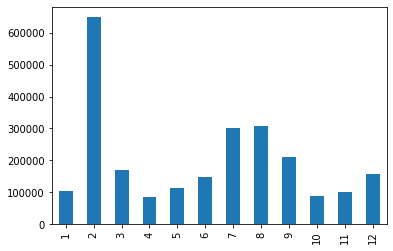

In [5]:
# look at the months in which data was revised
roadseg['revised'].dt.month.value_counts(sort=False).plot(kind='bar')

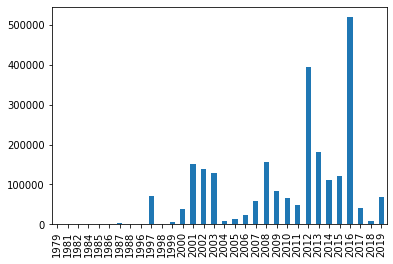

In [6]:
# look at the years in which data was revised
roadseg['revised'].dt.year.value_counts(sort=False).plot(kind='bar')

In [7]:
# min and max revised dates, by province
roadseg.groupby('datasetnam')['revised'].agg([min, max])

,min,max
datasetnam,,
Alberta,2012-05-30,2017-02-15
British Columbia,1979-07-01,2017-03-01
Manitoba,2000-07-01,2012-10-01
New Brunswick,2019-09-27,2019-09-27
Newfoundland and Labrador,2001-03-01,2012-09-01
Northwest Territories,1999-07-01,2017-11-01
Nova Scotia,2002-06-23,2017-03-14
Nunavut,1982-01-01,2013-01-01
Ontario,1999-12-01,2016-04-21


In [8]:
roadseg['revised'].dt.year.value_counts(sort=False)

1979       101
1981        10
1982        23
1984       204
1985         5
1986        28
1987      4487
1988       107
1996       314
1997     71575
1998       139
1999      5690
2000     37191
2001    151159
2002    138941
2003    127699
2004      7280
2005     12411
2006     22547
2007     58859
2008    157153
2009     82347
2010     65127
2011     47766
2012    394069
2013    181833
2014    110801
2015    121109
2016    519354
2017     41949
2018      7101
2019     67930
Name: revised, dtype: int64

In [9]:
roadseg['revised'].dt.is_month_start.value_counts()

True     1305063
False    1130246
Name: revised, dtype: int64